<a href="https://colab.research.google.com/github/walji123/sales-dashboard-analysis/blob/main/final_sales_dashboard_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


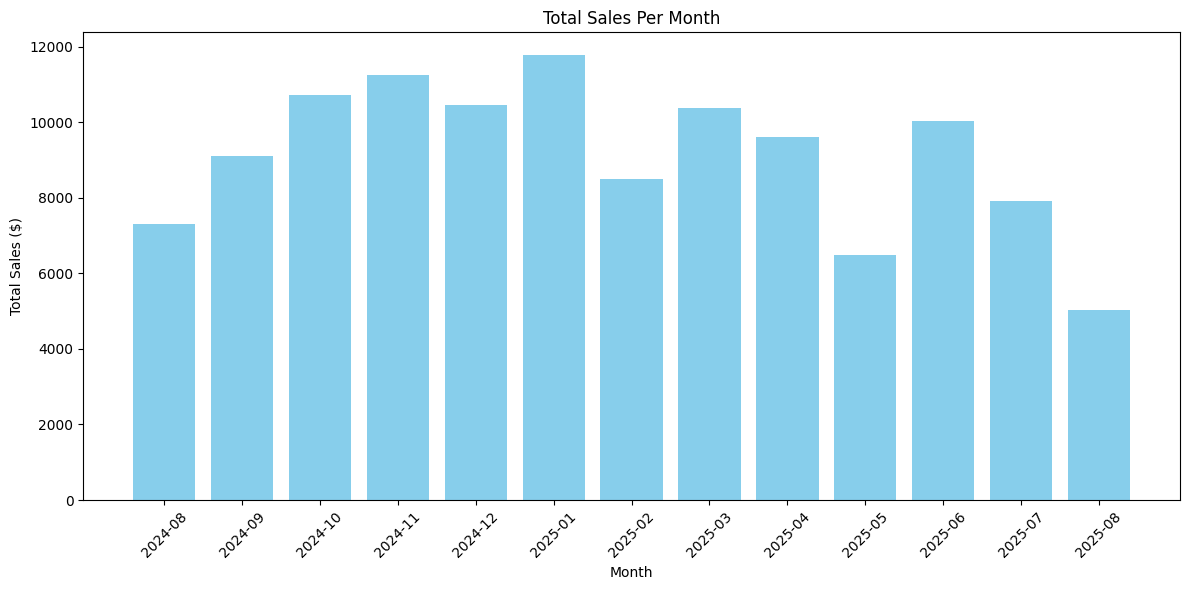

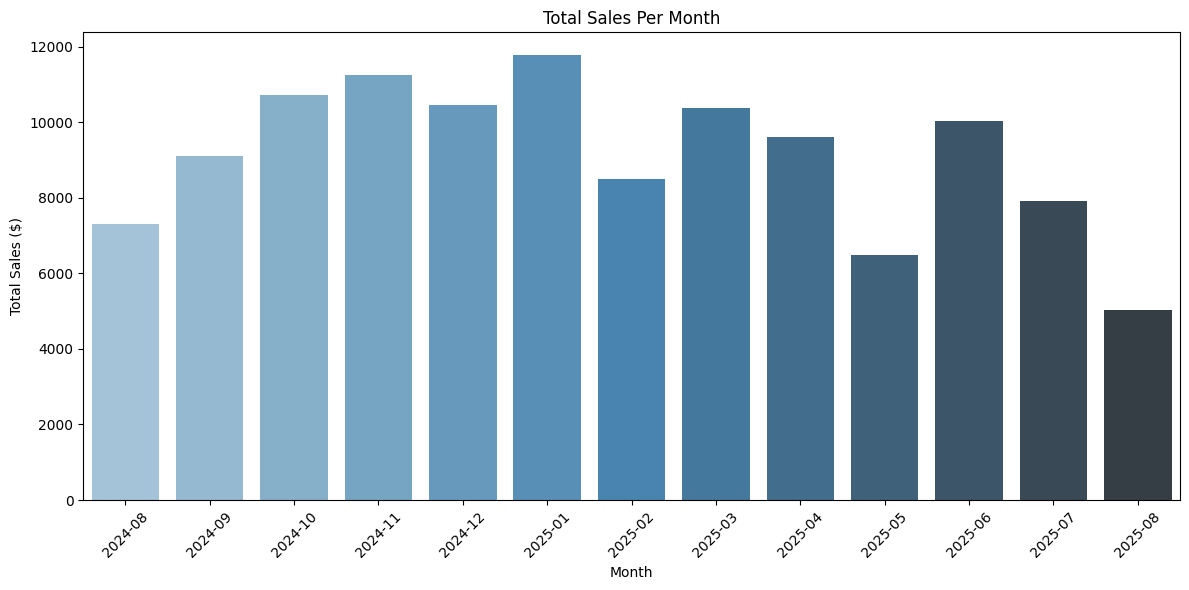

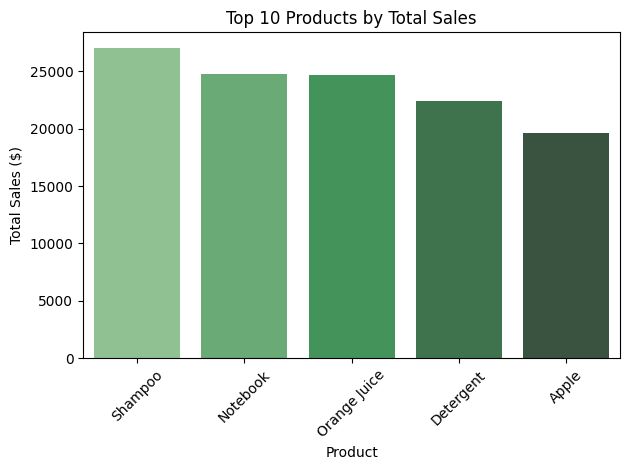

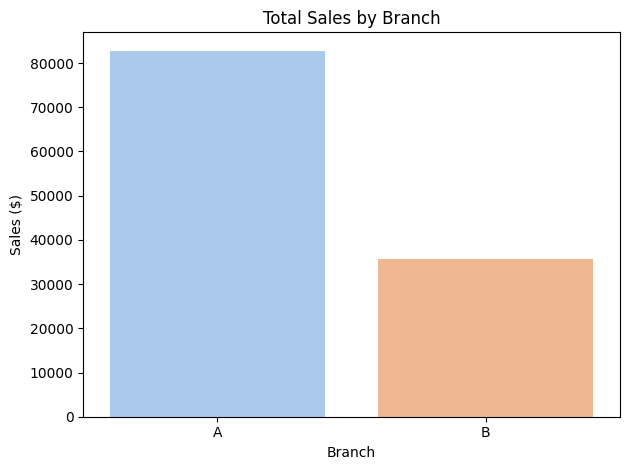

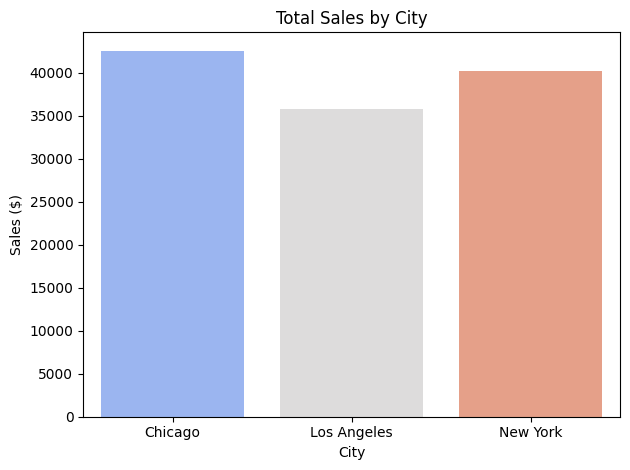

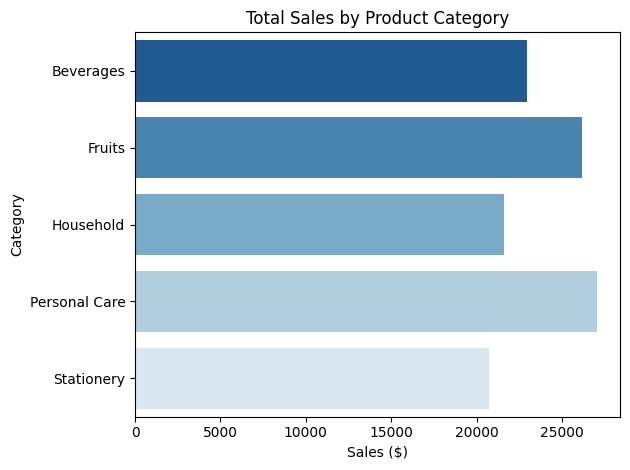

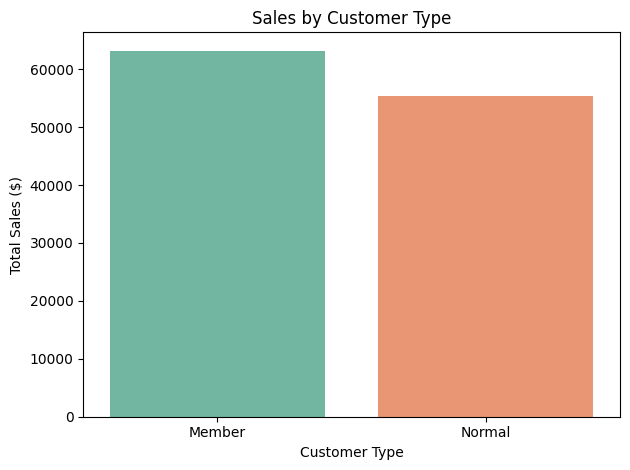

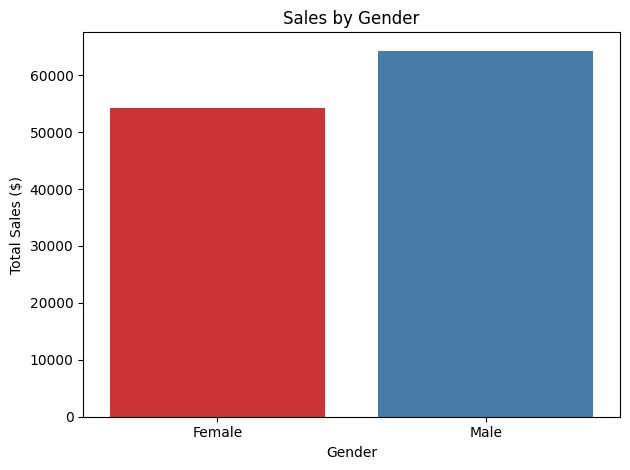

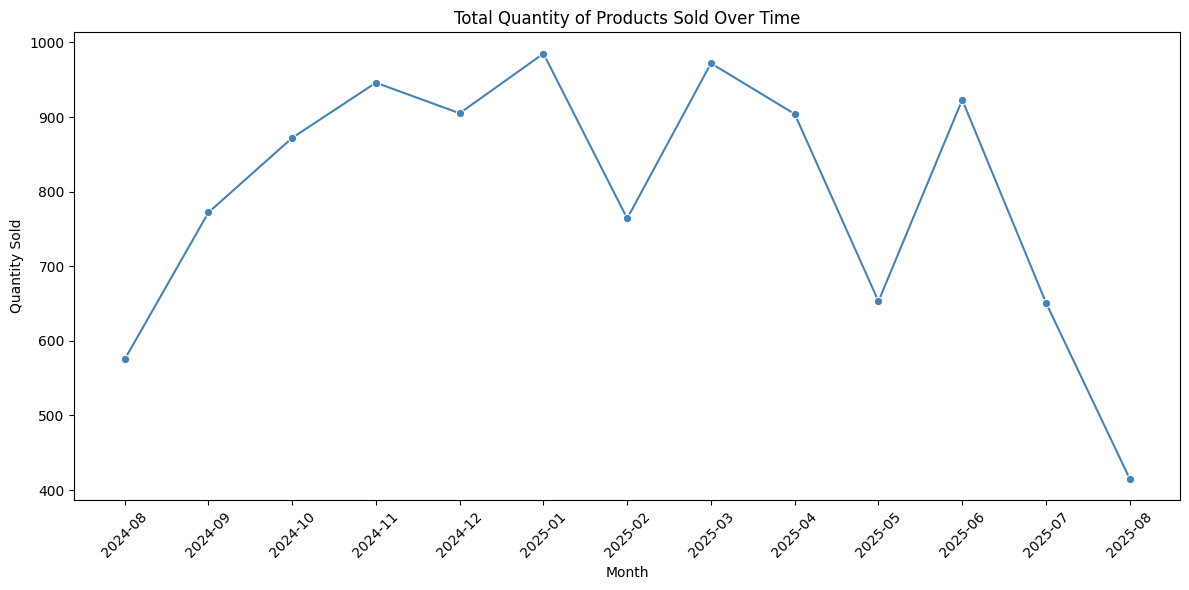

In [3]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings

# Suppress Seaborn FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Mount Google Drive
drive.mount('/content/drive')

# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/sales.csv')

# Remove Duplicates
df = df.drop_duplicates()

# Simulate 'date' column (random over past 365 days)
n = len(df)
date_range = pd.date_range(end=pd.Timestamp.today(), periods=365)
df['date'] = np.random.choice(date_range, size=n)
df['date'] = pd.to_datetime(df['date']).dt.date

# Convert 'date' back to datetime & create 'month' column
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')

# Group Monthly Sales
monthly_sales = df.groupby('month')['total_price'].sum().reset_index()
monthly_sales['month'] = monthly_sales['month'].astype(str)

# Total Sales Per Month (Matplotlib)
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales['month'], monthly_sales['total_price'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Total Sales Per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()

# Total Sales Per Month (Seaborn)
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='total_price', data=monthly_sales, hue='month', palette='Blues_d', legend=False)
plt.xticks(rotation=45)
plt.title('Total Sales Per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()

# Top 10 Products by Total Sales
top_products = df.groupby('product_name')['total_price'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=top_products, x='product_name', y='total_price', palette='Greens_d')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Total Sales by Branch
branch_sales = df.groupby('branch')['total_price'].sum().reset_index()
sns.barplot(data=branch_sales, x='branch', y='total_price', hue='branch', palette='pastel', legend=False)
plt.title('Total Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Sales ($)')
plt.tight_layout()
plt.show()

# Total Sales by City
city_sales = df.groupby('city')['total_price'].sum().reset_index()
sns.barplot(data=city_sales, x='city', y='total_price', hue='city', palette='coolwarm', legend=False)
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Sales ($)')
plt.tight_layout()
plt.show()

# Total Sales by Product Category
category_sales = df.groupby('product_category')['total_price'].sum().reset_index()
sns.barplot(data=category_sales, x='total_price', y='product_category', hue='product_category', palette='Blues_r', legend=False)
plt.title('Total Sales by Product Category')
plt.xlabel('Sales ($)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# Sales by Customer Type
cust_sales = df.groupby('customer_type')['total_price'].sum().reset_index()
sns.barplot(data=cust_sales, x='customer_type', y='total_price', hue='customer_type', palette='Set2', legend=False)
plt.title('Sales by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()

# Sales by Gender
gender_sales = df.groupby('gender')['total_price'].sum().reset_index()
sns.barplot(data=gender_sales, x='gender', y='total_price', hue='gender', palette='Set1', legend=False)
plt.title('Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()

# Quantity Sold Over Time (Inventory Proxy)
qty_trend = df.groupby('month')['quantity'].sum().reset_index()
qty_trend['month'] = qty_trend['month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=qty_trend, x='month', y='quantity', marker='o', color='steelblue')
plt.title('Total Quantity of Products Sold Over Time')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df.to_csv('/content/drive/MyDrive/cleaned_sales_data.csv', index=False)